In [99]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor

In [100]:
import os 
os.chdir("C:\\Users\\regangala\\Documents\\Data Science\\AirBnB1\\")
os.getcwd()

'C:\\Users\\regangala\\Documents\\Data Science\\AirBnB1'

In [117]:
path = "C:\\Users\\regangala\\Documents\\Data Science\\AirBnB1\\"
train = pd.read_csv(path + "train.csv")
test = pd.read_csv(path + "test.csv")

In [5]:
us_postal_codes = pd.read_csv(path + "us_postal_codes.csv")

In [125]:
# One-hot-encode categorical variables
train['dataset'] = "train"
test['dataset'] = "test"
data = pd.concat([train,test], axis = 0)
categorical = ['property_type','room_type','bed_type','cancellation_policy','city']
data = pd.get_dummies(data, columns = categorical)

In [126]:
data.host_has_profile_pic = data.host_has_profile_pic.replace("t", 1) 
data.host_has_profile_pic = data.host_has_profile_pic.replace("f", 0) 

data.host_identity_verified = data.host_identity_verified.replace("t", 1) 
data.host_identity_verified = data.host_identity_verified.replace("f", 0) 

data.instant_bookable = data.instant_bookable.replace("t", 1) 
data.instant_bookable = data.instant_bookable.replace("f", 0) 

data.amenities = data.amenities.str.replace("[{}]", "") 
amenity_one = data.amenities.str.get_dummies(sep = ",")

data = pd.concat([data,amenity_one], axis=1).drop('amenities', axis = 1)

In [127]:
data.host_response_rate = data.host_response_rate.str.replace("%","") 
data.host_response_rate[data.host_response_rate.isnull()] =0
data['host_response_rate'] = data.host_response_rate.astype(object).astype(int)

data['cleaning_fee'] = data['cleaning_fee']*1

data['first_review']=pd.to_datetime(data['first_review'])
data['first_review_Year'] = data['first_review'].dt.year
data['first_review_Month'] = data['first_review'].dt.month
data['first_review_Day'] =data['first_review'].dt.day
                     
data['last_review']=pd.to_datetime(data['last_review'])
data['last_review_Year'] = data['last_review'].dt.year
data['last_review_Month'] = data['last_review'].dt.month
data['last_review_Day'] = data['last_review'].dt.day

data['host_since']=pd.to_datetime(data['host_since'])
data['host_since_Year'] = data['host_since'].dt.year
data['host_since_Month'] = data['host_since'].dt.month
data['host_since_Day'] = data['host_since'].dt.day

data['thumbnail_url'] = data['thumbnail_url'].where(data['thumbnail_url'].isnull(), 1).fillna(0).astype(int)
#data = data.drop(['latitude','longitude'],axis=1)

In [76]:
#data = data.drop(['latitude','longitude'],axis=1)


 mu = 4.78 and sigma = 0.72



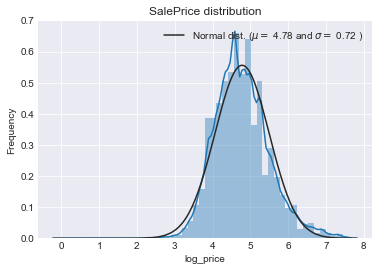

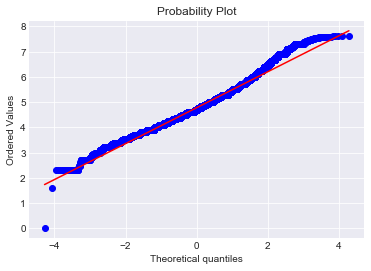

In [128]:
sns.distplot(train['log_price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['log_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['log_price'], plot=plt)
plt.show()

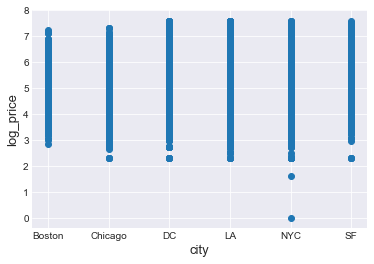

In [129]:
fig, ax = plt.subplots()
ax.scatter(x = train['city'], y = train['log_price'])
plt.ylabel('log_price', fontsize=13)
plt.xlabel('city', fontsize=13)
plt.show()

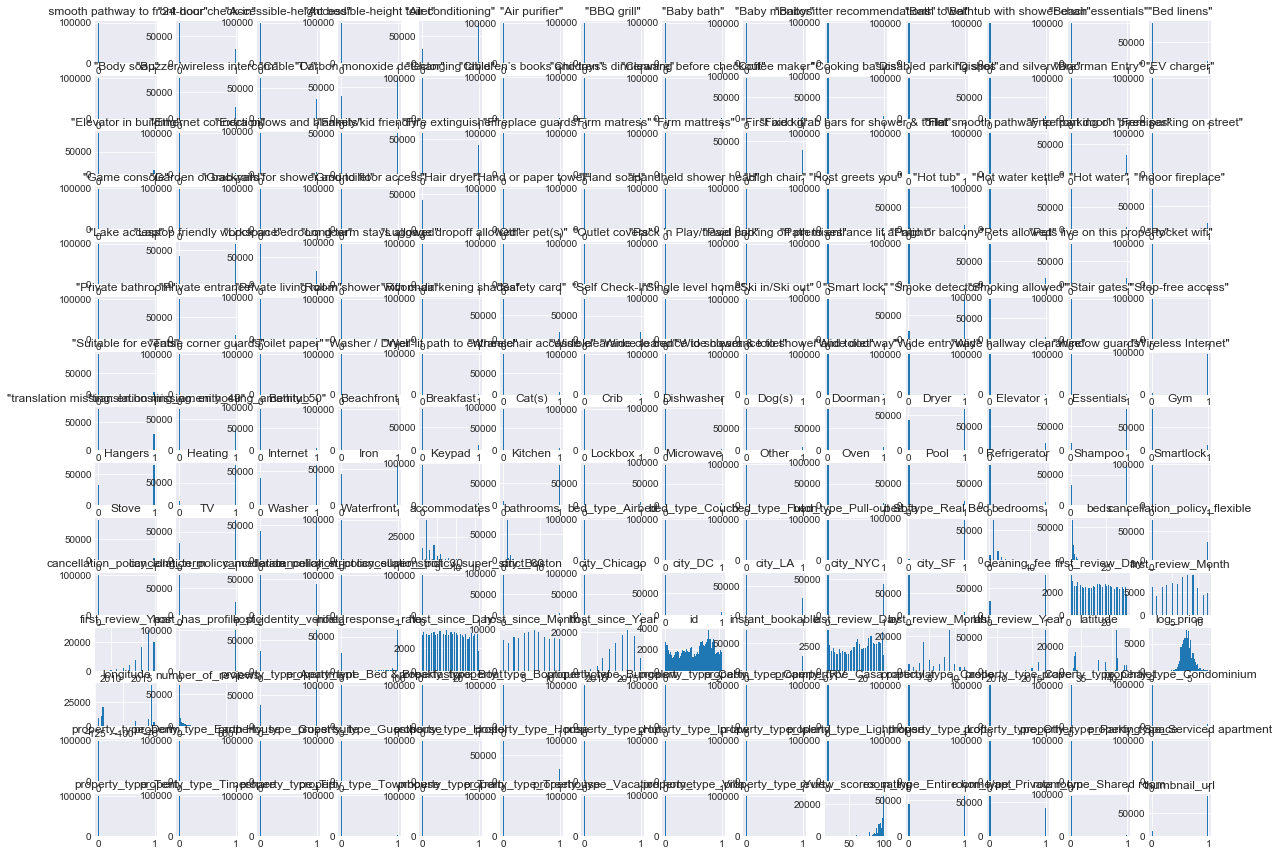

In [130]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [133]:
corr_matrix = data.corr()
corr_matrix["log_price"].sort_values(ascending=False)

log_price                                       1.000
room_type_Entire home/apt                       0.602
accommodates                                    0.568
bedrooms                                        0.473
beds                                            0.442
bathrooms                                       0.355
"Family/kid friendly"                           0.290
TV                                              0.264
"Cable TV"                                      0.238
Dryer                                           0.172
"Indoor fireplace"                              0.171
city_SF                                         0.167
Washer                                          0.165
cancellation_policy_strict                      0.129
Doorman                                         0.120
"Hair dryer"                                    0.118
"Suitable for events"                           0.116
"Private entrance"                              0.114
Gym                         

In [111]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


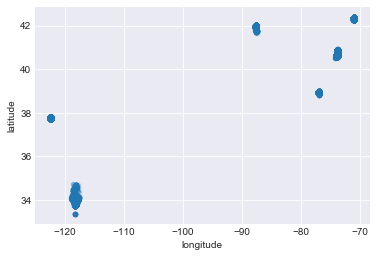

In [134]:

data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)
plt.savefig('map1.png')

In [123]:
N = pd.read_csv(path + "train.csv")
N['city'].unique()

array(['NYC', 'SF', 'DC', 'LA', 'Chicago', 'Boston'], dtype=object)

In [135]:
data["NewScore"] = data['number_of_reviews']*0.75 + data['review_scores_rating']*0.25

In [116]:
data['NewScore']

0        26.500
1        27.750
2        30.500
3           nan
4        13.000
5        27.250
6        35.500
7        30.000
8       144.000
9        24.000
10       84.750
11       46.000
12          nan
13       32.000
14       26.500
15          nan
16       34.000
17       31.000
18       41.000
19       21.750
20       44.000
21       65.000
22       79.500
23       26.500
24          nan
25       35.500
26       25.750
27       28.000
28       26.750
29       52.000
          ...  
25428       nan
25429    25.750
25430       nan
25431    37.750
25432       nan
25433    27.250
25434    26.500
25435    26.500
25436    26.750
25437    37.500
25438       nan
25439    90.250
25440    29.000
25441    25.750
25442       nan
25443    25.750
25444    44.000
25445       nan
25446    25.000
25447       nan
25448    27.750
25449       nan
25450   176.750
25451    26.750
25452       nan
25453    28.500
25454       nan
25455    32.000
25456       nan
25457    26.750
Name: NewScore, Length: 

In [136]:
all_data_na = (data.isnull().sum() / len(data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
log_price,25.568
NewScore,22.536
review_scores_rating,22.536
first_review,21.392
first_review_Day,21.392
first_review_Month,21.392
first_review_Year,21.392
last_review,21.344
last_review_Day,21.344
last_review_Month,21.344


In [137]:
# Objects to be converted into integers 
#dataset  leave it    
#description    leave it 
#first_review  2016-07-18
#host_has_profile_pic - t / f -Done
#host_identity_verified  - t / f  -Done
#host_response_rate -100% and NAN
#host_since    2012-03-26
#instant_bookable  - t/f  -Done
#last_review  - 2016-07-18 
#name      
#thumbnail_url  -  https:/ 
#zipcode - 11201

data['first_review']=pd.to_datetime(data['first_review'])
data['last_review']=pd.to_datetime(data['last_review'])
data['host_since']=pd.to_datetime(data['host_since'])


data['first_host']= (data['first_review'] - data['host_since'])/ np.timedelta64(1, 'D')
data['first_last']= (data['last_review'] - data['last_review'])/ np.timedelta64(1, 'D')
data['host_last']=  (data['first_review'] - data['host_since'])/ np.timedelta64(1, 'D')

In [109]:
data['first_host'][:10] 

0    1545.0
1      47.0
2     187.0
3       NaN
4      72.0
5      81.0
6       7.0
7    1308.0
8     254.0
9      22.0
Name: first_host, dtype: float64

In [49]:
numerics = ['uint8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
ProcessedDataTrain = data[data.dataset == "train"] \
    .select_dtypes(include=numerics) \
    .fillna(0) 
    
ProcessedDataTest = data[data.dataset == "test"] \
    .select_dtypes(include=numerics) \
    .fillna(0) 

In [50]:
ProcessedDataTrain.to_csv('ProcessedDataTrain.csv', index = False)
ProcessedDataTest.to_csv('ProcessedDataTest.csv', index = False)

In [138]:
# Select only numeric data and impute missing values as 0
numerics = ['uint8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
train_x = data[data.dataset == "train"] \
    .select_dtypes(include=numerics) \
    .drop("log_price", axis = 1) \
    .fillna(0) \
    .values

test_x = data[data.dataset == "test"] \
    .select_dtypes(include=numerics) \
    .drop("log_price", axis = 1) \
    .fillna(0) \
    .values
    
train_y = data[data.dataset == "train"].log_price.values

In [139]:
test_x

array([[  2.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          7.10000000e+01,   0.00000000e+00,   7.10000000e+01],
       [  3.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          1.01300000e+03,   0.00000000e+00,   1.01300000e+03],
       [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          1.93000000e+03,   0.00000000e+00,   1.93000000e+03],
       ..., 
       [  2.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          2.82000000e+02,   0.00000000e+00,   2.82000000e+02],
       [  4.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          1.81500000e+03,   0.00000000e+00,   1.81500000e+03]])

In [140]:
from sklearn.model_selection import KFold
cv_groups = KFold(n_splits=10)
regr = RandomForestRegressor(random_state = 3, n_estimators = 500, criterion='mse',n_jobs=-1 )

In [141]:
for train_index, test_index in cv_groups.split(train_x):
    
    # Train the model using the training sets
    regr.fit(train_x[train_index], train_y[train_index])
    
    # Make predictions using the testing set
    pred_rf = regr.predict(train_x[test_index])
    
    # Calculate RMSE for current cross-validation split
    rmse = str(np.sqrt(np.mean((train_y[test_index] - pred_rf)**2)))
    
    print("RMSE for current split: " + rmse)

RMSE for current split: 0.391888294974


KeyboardInterrupt: 

In [28]:
# Create submission file
regr.fit(train_x, train_y)
final_prediction = regr.predict(test_x)

In [29]:
submission = pd.DataFrame(np.column_stack([test.id, final_prediction]), columns = ['id','log_price'])
submission.to_csv("sample_submission9.csv", index = False)

In [39]:
#features = iris['feature_names']
importances = regr.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

ZeroDivisionError: division by zero

In [40]:
importances

NameError: name 'importances' is not defined